In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.datasets import make_blobs

In [2]:
x,y = make_blobs(n_samples=500,centers=5,random_state=3)
print(x.shape)
print(y.shape)

(500, 2)
(500,)


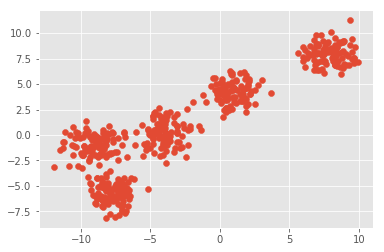

In [65]:
plt.figure(0)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [67]:
k = 5 # No. of clusters

color = ["green","red","blue","yellow","orange"]
clusters = {}

for kx in range(k):
    center = 10*(2*np.random.random((x.shape[1],)) -1) #generating a point in range -10 to 10
    points = []
    cluster = {
    'center':center,
    'points':points,
    'color':color[kx],
    }
    
    clusters[kx] = cluster
    

In [68]:
clusters

{0: {'center': array([-9.62175603, -7.59993752]),
  'points': [],
  'color': 'green'},
 1: {'center': array([2.69583547, 3.56362982]), 'points': [], 'color': 'red'},
 2: {'center': array([4.99908543, 9.27126025]), 'points': [], 'color': 'blue'},
 3: {'center': array([-1.64845383,  5.52301785]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-9.87076966, -1.28662821]),
  'points': [],
  'color': 'orange'}}

In [69]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [72]:
def assignPointToClusters(clusters): #E-Step
    for ix in range(x.shape[0]):
        dist = []
        curr_x = x[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list 
            
    assignPointToClusters(clusters)
                    
def plotClusters(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")
        



(99, 2)
(100, 2)
(100, 2)
(98, 2)
(103, 2)


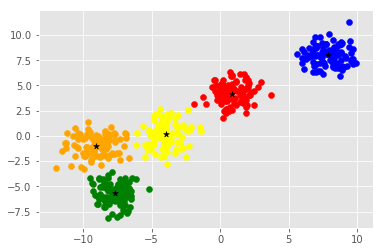

In [80]:
assignPointToClusters(clusters)
updateClusters(clusters)
plotClusters(clusters)